<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Sushant/Deep_Learning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
timeit

<module 'timeit' from '/usr/lib/python3.7/timeit.py'>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import timeit
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
4.4026168850000005
GPU (s):
0.046411016999996946
GPU speedup over CPU: 94x


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Lets look at the training data
print("Training Images Shape: ",train_images.shape)
print("Training Labels: ",train_labels)

#Lets look at the testing data
print("Testing Images Shape: ",test_images.shape)
print("Testing Labels: ",test_labels)

Training Images Shape:  (60000, 28, 28)
Training Labels:  [5 0 4 ... 5 6 8]
Testing Images Shape:  (10000, 28, 28)
Testing Labels:  [7 2 1 ... 4 5 6]


In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu',name="second_last_layser"),
    layers.Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 second_last_layser (Dense)  (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
model.fit(train_images , train_labels ,epochs = 30, batch_size = 256)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


235/235 [==============================] - 2s 5ms/step - loss: 2.6421 - sparse_categorical_accuracy: 0.8811
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1085 - sparse_categorical_accuracy: 0.9662
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9776
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0539 - sparse_categorical_accuracy: 0.9823
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0457 - sparse_categorical_accuracy: 0.9857
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0415 - sparse_categorical_accuracy: 0.9869
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9883
Epoch 8/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9880
Epoch 9/30
235/235 [==============================] - 1s 4m

In [ ]:
evaluation = model.evaluate(test_images , test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.1169 - sparse_categorical_accuracy: 0.9822


In [ ]:
evaluation

[0.11692234873771667, 0.982200026512146]

# Problem 1 Part 3

In [ ]:
prediction = model.predict(test_images)

In [ ]:
prediction.shape

(10000, 10)

In [ ]:
prediction[:3].argmax()

7

In [ ]:
prediction[0:10]

array([[5.04256614e-17, 1.09031314e-13, 2.57944724e-14, 1.04619760e-15,
        1.41730709e-15, 4.91272179e-21, 8.46701348e-21, 1.00000000e+00,
        5.90713620e-15, 3.41963979e-13],
       [3.08645471e-35, 3.16522778e-31, 1.00000000e+00, 9.96359826e-31,
        3.88044805e-35, 6.80469935e-31, 0.00000000e+00, 8.53572151e-31,
        1.76510667e-29, 0.00000000e+00],
       [2.19779593e-18, 1.00000000e+00, 2.63314672e-19, 1.31715291e-19,
        1.66004075e-14, 4.62751516e-16, 1.49553477e-17, 4.24701162e-17,
        5.26776600e-14, 5.92032190e-19],
       [1.00000000e+00, 3.52719571e-20, 1.65319025e-18, 2.22552001e-17,
        6.28367157e-17, 1.96811155e-15, 1.73649642e-13, 4.21055479e-17,
        5.63044247e-14, 9.25498268e-16],
       [5.02195769e-21, 3.85371452e-22, 2.26127406e-17, 3.83654297e-27,
        1.00000000e+00, 1.62187771e-24, 1.62286424e-21, 1.59553313e-17,
        3.21882317e-19, 9.34671177e-13],
       [1.08986801e-21, 1.00000000e+00, 3.73866711e-23, 1.33655583e-23,
   

In [ ]:
predictions_1000 = prediction[:1000]

[424 407 884 498 490 485 459 895 896 443]
[826 725 523 224 228 506 504 735 239 489]
[549 225 452 208 731 875 221 873 222 444]
[808 925 648 912 500 323 819 727 923 927]
[379 803 533 532 519 484 475 428 425 420]
[739 207 618 356 364 934 935 187 638 367]
[392 472 943 461 164 161 462 156 463 952]
[  0 909 617 605 585 579 917 554 510 494]
[486 134 458 146 466 110 355 621 805 181]
[788 706 599  99 733 481 108 496 630 118]


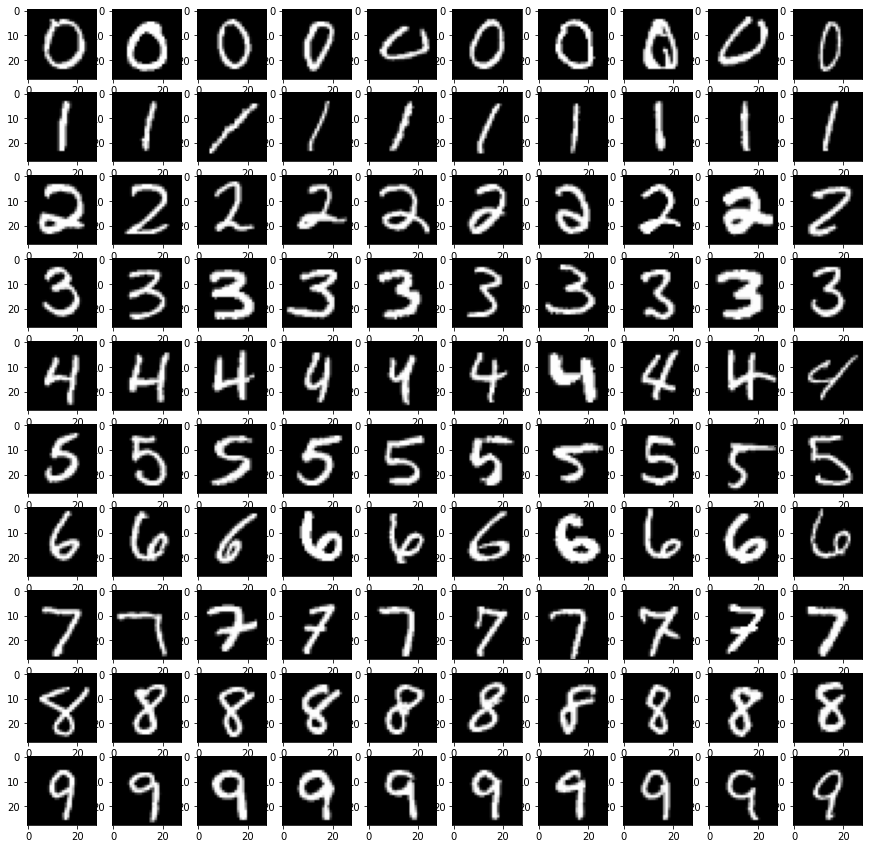

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(15,15))
for i in range(0,10):
  image_pred = np.argsort(predictions_1000[:,i])[::-1][:10]
  print(image_pred)
  for j in range(10):
    axs[i,j].imshow(test_images[image_pred[j]], cmap=plt.get_cmap('gray'))
plt.show()

# Problem 1 Part 4

In [ ]:
layer_second_last = model.layers[-2].output

In [ ]:
layer_second_last.shape

TensorShape([None, 1024])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 second_last_layser (Dense)  (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [ ]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="second_last_layser").output,
)

# features is output of the model till second last layer
features = feature_extractor(test_images[:10000])

In [ ]:
pred_2_last = np.array(features)

In [ ]:
np_features = tf.nn.softmax(pred_2_last[np.random.choice(a=range(10000),size=1000,replace=False),:][:,np.random.choice(a=range(1024),size=10,replace=False)]).numpy().argmax(axis=1)


In [ ]:
np_features

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

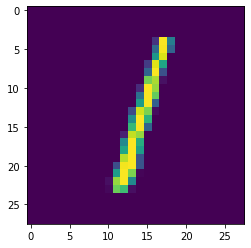

In [ ]:
plt.imshow(test_images[2])

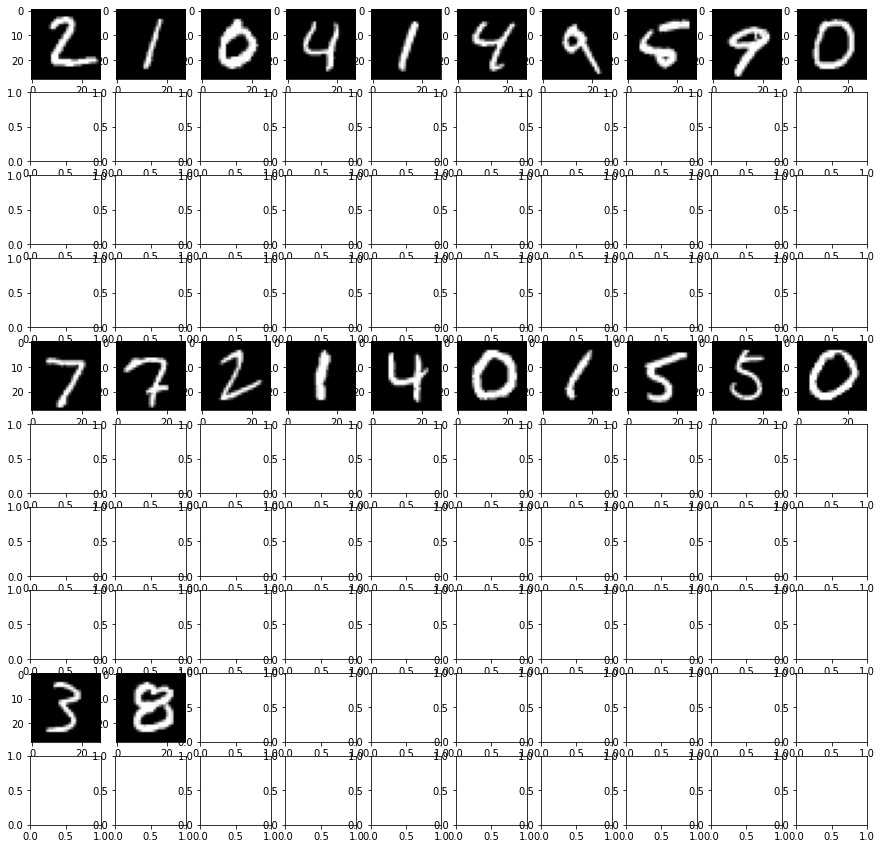

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(15,15))
for i in range(10):  
    result = np.where(np_features==i)[0][:10]
    for j in range(10):
      try:
          axs[i,j].imshow(test_images[result[j]], cmap=plt.get_cmap('gray'))
      except:
          continue
plt.show()

# Problem 2

In [ ]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


train_images = train_images/255
test_images = test_images/255

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images = train_images.reshape(len(train_images), 784)
test_images = test_images.reshape(len(test_images), 784)


In [ ]:
train_images.shape

(60000, 784)

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
# One-Hot Encoding
#train_labels = keras.utils.np_utils.to_categorical(y_train, 10)
#test_labels = keras.utils.np_utils.to_categorical(y_test, 10)
train_cat = to_categorical(train_labels, num_classes=10)
test_cat = to_categorical(test_labels, num_classes=10)

In [ ]:
optimizer_sgd = keras.optimizers.SGD(learning_rate=0.01)
optimizer_adam = keras.optimizers.Adam()

In [ ]:
xavier_normal = keras.initializers.GlorotNormal()
normal_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
he_init = keras.initializers.HeNormal()

## Model 1

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax", kernel_initializer=normal_init)
  ])

In [ ]:
model_1.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model1_history = model_1.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

## Model 2

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax", kernel_initializer=xavier_normal)
  ])

In [ ]:
model_2.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model2_history = model_2.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

## Model 3

In [ ]:
model_3 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_3.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model3_history = model_3.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

## Model 4

In [ ]:
model_4 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_4.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [67]:
model4_history = model_4.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 4s 8ms/step - loss: 1.3696 - acc: 0.6662 - val_loss: 0.5253 - val_acc: 0.8481
Epoch 2/200
469/469 [==============================] - 3s 7ms/step - loss: 0.4007 - acc: 0.8853 - val_loss: 0.3143 - val_acc: 0.9097
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.2986 - acc: 0.9131 - val_loss: 0.2680 - val_acc: 0.9207
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2527 - acc: 0.9261 - val_loss: 0.2391 - val_acc: 0.9281
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2225 - acc: 0.9350 - val_loss: 0.2119 - val_acc: 0.9382
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1988 - acc: 0.9423 - val_loss: 0.1865 - val_acc: 0.9445
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1795 - acc: 0.9477 - val_loss: 0.1720 - val_acc: 0.9497
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model 5

In [ ]:
model_5 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_5.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [68]:
model5_history = model_5.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 2s 5ms/step - loss: 1.2717 - acc: 0.6938 - val_loss: 0.4853 - val_acc: 0.8553
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3854 - acc: 0.8903 - val_loss: 0.3337 - val_acc: 0.8979
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2934 - acc: 0.9146 - val_loss: 0.2566 - val_acc: 0.9249
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2491 - acc: 0.9278 - val_loss: 0.2244 - val_acc: 0.9326
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2188 - acc: 0.9364 - val_loss: 0.2041 - val_acc: 0.9371
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1965 - acc: 0.9424 - val_loss: 0.1825 - val_acc: 0.9447
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1770 - acc: 0.9481 - val_loss: 0.1700 - val_acc: 0.9491
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


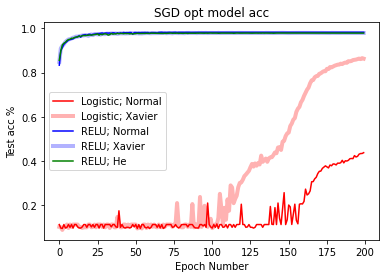

In [70]:
plt.plot(model1_history.history['val_acc'], color = 'red')
plt.plot(model2_history.history['val_acc'], color='red',linewidth=4.0,alpha=0.3)
plt.plot(model3_history.history['val_acc'], color = 'blue')
plt.plot(model4_history.history['val_acc'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(model5_history.history['val_acc'],color='green')
plt.title('SGD opt model acc')
plt.ylabel('Test acc %')
plt.xlabel('Epoch Number')
plt.legend(['Logistic; Normal', 'Logistic; Xavier', 'RELU; Normal', 'RELU; Xavier','RELU; He'], loc='bottom right')
plt.show()

# Models with Adam Optimizer

In [ ]:
model6 = define_model(act_fxn= 'sigmoid',init = normal_initializer)
model7 = define_model(act_fxn= 'sigmoid',init = xavier_ini_normal)
model8 = define_model(act_fxn= 'relu',init = normal_initializer)
model9 = define_model(act_fxn= 'relu',init = xavier_ini_normal)
model10 = define_model(act_fxn= 'relu',init = he_initializer)

In [71]:
model_adam_1 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [72]:
model_adam_1.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model_adam_1_history = model_adam_1.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 1.7446 - acc: 0.2815 - val_loss: 1.2416 - val_acc: 0.4910
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.7435 - acc: 0.7335 - val_loss: 0.4227 - val_acc: 0.8791
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.3261 - acc: 0.9080 - val_loss: 0.2838 - val_acc: 0.9218
Epoch 4/200
469/469 [==============================] - 4s 9ms/step - loss: 0.2405 - acc: 0.9338 - val_loss: 0.2265 - val_acc: 0.9385
Epoch 5/200
469/469 [==============================] - 3s 5ms/step - loss: 0.1892 - acc: 0.9481 - val_loss: 0.1899 - val_acc: 0.9479
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1560 - acc: 0.9566 - val_loss: 0.1656 - val_acc: 0.9550
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1284 - acc: 0.9645 - val_loss: 0.1354 - val_acc: 0.9609
Epoch 8/200
469/469 [==============================] - 2s 5ms/step - 

## Model Adam 2

In [ ]:
model_adam_2 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_adam_2.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [76]:
model_adam_2_history = model_adam_2.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 1.0931 - acc: 0.6046 - val_loss: 0.2553 - val_acc: 0.9312
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1711 - acc: 0.9519 - val_loss: 0.1355 - val_acc: 0.9616
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1083 - acc: 0.9693 - val_loss: 0.1149 - val_acc: 0.9680
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0787 - acc: 0.9777 - val_loss: 0.0978 - val_acc: 0.9726
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0625 - acc: 0.9820 - val_loss: 0.0866 - val_acc: 0.9761
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0489 - acc: 0.9853 - val_loss: 0.0951 - val_acc: 0.9748
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0417 - acc: 0.9876 - val_loss: 0.0930 - val_acc: 0.9746
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model Adam 3

In [79]:
model_adam_3 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [80]:
model_adam_3.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [81]:
model_adam_3_history = model_adam_3.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.5897 - acc: 0.7903 - val_loss: 0.1658 - val_acc: 0.9537
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.1210 - acc: 0.9654 - val_loss: 0.1090 - val_acc: 0.9682
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0776 - acc: 0.9768 - val_loss: 0.1044 - val_acc: 0.9690
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0554 - acc: 0.9835 - val_loss: 0.0946 - val_acc: 0.9736
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0437 - acc: 0.9862 - val_loss: 0.0997 - val_acc: 0.9749
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0350 - acc: 0.9893 - val_loss: 0.0922 - val_acc: 0.9769
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0281 - acc: 0.9917 - val_loss: 0.0957 - val_acc: 0.9769
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model Adam 4

In [82]:
model_adam_4 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [83]:
model_adam_4.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model_adam_4_history = model_adam_4.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.2559 - acc: 0.9228 - val_loss: 0.1102 - val_acc: 0.9686
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0894 - acc: 0.9739 - val_loss: 0.0883 - val_acc: 0.9744
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0588 - acc: 0.9820 - val_loss: 0.0918 - val_acc: 0.9761
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0431 - acc: 0.9873 - val_loss: 0.0894 - val_acc: 0.9765
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0844 - val_acc: 0.9793
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0305 - acc: 0.9909 - val_loss: 0.0790 - val_acc: 0.9807
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0230 - acc: 0.9929 - val_loss: 0.0735 - val_acc: 0.9812
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model Adam 5

In [ ]:
model_adam_5 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_adam_5.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model_adam_5_history = model_adam_5.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2458 - acc: 0.9265 - val_loss: 0.1145 - val_acc: 0.9676
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0845 - acc: 0.9741 - val_loss: 0.0953 - val_acc: 0.9732
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0582 - acc: 0.9821 - val_loss: 0.0755 - val_acc: 0.9782
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0425 - acc: 0.9870 - val_loss: 0.0889 - val_acc: 0.9782
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0926 - val_acc: 0.9762
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0299 - acc: 0.9904 - val_loss: 0.0861 - val_acc: 0.9786
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0226 - acc: 0.9931 - val_loss: 0.1064 - val_acc: 0.9781
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


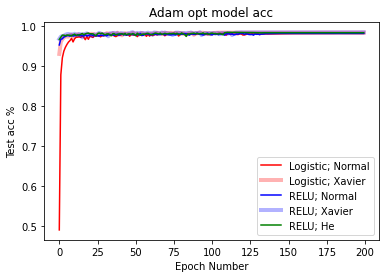

In [89]:
plt.plot(model_adam_1_history.history['val_acc'], color = 'red')
plt.plot(model_adam_2_history.history['val_acc'], color='red',linewidth=4.0,alpha=0.3)
plt.plot(model_adam_3_history.history['val_acc'], color = 'blue')
plt.plot(model_adam_4_history.history['val_acc'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(model_adam_5_history.history['val_acc'],color='green')
plt.title('Adam opt model acc')
plt.ylabel('Test acc %')
plt.xlabel('Epoch Number')
plt.legend(['Logistic; Normal', 'Logistic; Xavier', 'RELU; Normal', 'RELU; Xavier','RELU; He'], loc='bottom right')
plt.show()

# Problem 3

## Model 1

In [97]:
no_dropout_1 = keras.Sequential([
    keras.layers.Dense(units=1024, input_shape=(784,), activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [98]:
no_dropout_1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

In [99]:
no_dropout_1_history = no_dropout_1.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 3s 5ms/step - loss: 0.9521 - acc: 0.6630 - val_loss: 0.3201 - val_acc: 0.9049
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2445 - acc: 0.9283 - val_loss: 0.1819 - val_acc: 0.9468
Epoch 3/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1527 - acc: 0.9547 - val_loss: 0.1811 - val_acc: 0.9470
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.1185 - acc: 0.9648 - val_loss: 0.1223 - val_acc: 0.9628
Epoch 5/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0928 - acc: 0.9721 - val_loss: 0.1151 - val_acc: 0.9681
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0757 - acc: 0.9771 - val_loss: 0.1088 - val_acc: 0.9689
Epoch 7/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0606 - acc: 0.9818 - val_loss: 0.0887 - val_acc: 0.9753
Epoch 8/500
469/469 [==============================] - 2s 5ms/step - 

In [101]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [104]:
path=F"/content/gdrive/My Drive/Models/model1"
# save
no_dropout_1.save_weights(path,save_format='tf')

## Model 3

In [105]:
no_dropout_3 = keras.Sequential([
    keras.layers.Dense(units=1024, input_shape=(784,), activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [106]:
no_dropout_3.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['acc'])

In [107]:
no_dropout_3_history = no_dropout_3.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 3s 6ms/step - loss: 0.3487 - acc: 0.9036 - val_loss: 0.1211 - val_acc: 0.9666
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0970 - acc: 0.9699 - val_loss: 0.0962 - val_acc: 0.9721
Epoch 3/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0675 - acc: 0.9799 - val_loss: 0.0946 - val_acc: 0.9751
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0518 - acc: 0.9843 - val_loss: 0.0771 - val_acc: 0.9788
Epoch 5/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0386 - acc: 0.9884 - val_loss: 0.0946 - val_acc: 0.9740
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0334 - acc: 0.9899 - val_loss: 0.0876 - val_acc: 0.9778
Epoch 7/500
469/469 [==============================] - 2s 5ms/step - loss: 0.0284 - acc: 0.9916 - val_loss: 0.0985 - val_acc: 0.9771
Epoch 8/500
469/469 [==============================] - 2s 5ms/step - 

In [108]:
path=F"/content/gdrive/My Drive/Models/DLHW1Q3model3"
no_dropout_3.save(path,save_format='tf')

## Dropout Model 2

In [109]:
dropout_model2 = keras.models.Sequential([
  keras.layers.Dense(units=1024, input_shape=(784,)),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10,activation = 'softmax')
])

In [110]:
dropout_model2.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['acc'])

In [111]:
dropout_model2_history = dropout_model2.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 3s 6ms/step - loss: 2.3515 - acc: 0.1057 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/500
469/469 [==============================] - 3s 5ms/step - loss: 2.3025 - acc: 0.1098 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 3/500
469/469 [==============================] - 3s 5ms/step - loss: 2.3020 - acc: 0.1104 - val_loss: 2.3018 - val_acc: 0.1135
Epoch 4/500
469/469 [==============================] - 3s 5ms/step - loss: 2.3018 - acc: 0.1120 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 5/500
469/469 [==============================] - 3s 5ms/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/500
469/469 [==============================] - 3s 5ms/step - loss: 2.3016 - acc: 0.1123 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 7/500
469/469 [==============================] - 3s 5ms/step - loss: 2.3014 - acc: 0.1120 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 8/500
469/469 [==============================] - 2s 5ms/step - 

In [112]:
path=F"/content/gdrive/My Drive/Models/DLHW1Q3model2"
dropout_model2.save(path,save_format='tf')

## Dropout Model 4

In [113]:
dropout_model4 = keras.models.Sequential([
  keras.layers.Dense(units=1024, input_shape=(784,)),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10,activation = 'softmax')
])

In [114]:
dropout_model4.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['acc'])

In [115]:
dropout_model4_history = dropout_model4.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 3s 6ms/step - loss: 0.8885 - acc: 0.7346 - val_loss: 0.3308 - val_acc: 0.9189
Epoch 2/500
469/469 [==============================] - 2s 5ms/step - loss: 0.4164 - acc: 0.8976 - val_loss: 0.2620 - val_acc: 0.9319
Epoch 3/500
469/469 [==============================] - 3s 6ms/step - loss: 0.3420 - acc: 0.9179 - val_loss: 0.2315 - val_acc: 0.9395
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.3002 - acc: 0.9266 - val_loss: 0.2457 - val_acc: 0.9411
Epoch 5/500
469/469 [==============================] - 3s 5ms/step - loss: 0.2853 - acc: 0.9311 - val_loss: 0.2286 - val_acc: 0.9527
Epoch 6/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2719 - acc: 0.9356 - val_loss: 0.2141 - val_acc: 0.9502
Epoch 7/500
469/469 [==============================] - 3s 5ms/step - loss: 0.2525 - acc: 0.9398 - val_loss: 0.2147 - val_acc: 0.9495
Epoch 8/500
469/469 [==============================] - 3s 5ms/step - 

In [116]:
path=F"/content/gdrive/My Drive/Models/DLHW1Q3model4"
dropout_model4.save(path,save_format='tf')

## Plotting for Problem 3

### 1024 X RELU

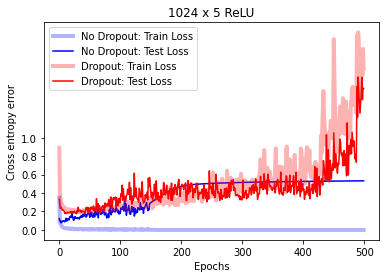

In [117]:
plt.plot(no_dropout_3_history.history['loss'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(no_dropout_3_history.history['val_loss'], color = 'blue')
plt.plot(dropout_model4_history.history['loss'],color='red',linewidth=4.0,alpha=0.3)
plt.plot(dropout_model4_history.history['val_loss'], color = 'red')

plt.legend(['No Dropout: Train Loss','No Dropout: Test Loss','Dropout: Train Loss','Dropout: Test Loss'])
plt.yticks(np.arange(0,1.2,0.2))
plt.xlabel('Epochs')
plt.ylabel('Cross entropy error')
plt.title('1024 x 5 ReLU')
plt.show()

### 1024 X Logistic

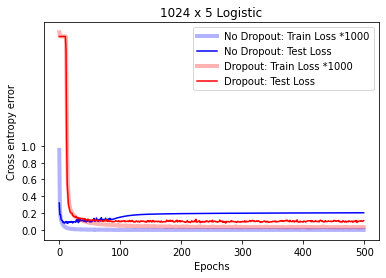

In [118]:
plt.plot(no_dropout_1_history.history['loss'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(no_dropout_1_history.history['val_loss'], color = 'blue')
plt.plot(dropout_model2_history.history['loss'],color='red',linewidth=4.0,alpha=0.3)
plt.plot(dropout_model2_history.history['val_loss'], color = 'red')

plt.legend(['No Dropout: Train Loss *1000','No Dropout: Test Loss','Dropout: Train Loss *1000','Dropout: Test Loss'])
plt.yticks(np.arange(0,1.2,0.2))
plt.xlabel('Epochs')
plt.ylabel('Cross entropy error')
plt.title('1024 x 5 Logistic')
plt.show()